## Фомченко Александр Валерьевич, ИУ8-31М
### alexvin364@mail.ru

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

def count_cat(table):
    for name in table.columns:
        print(name, end = ": ")
        print(table[name].nunique())

table = pd.read_csv("table.csv", sep = ";")
count_cat(table)

EVENT_TIME: 28884
USER_HASH: 7608
EVENT_TYPE: 1
EVENT_TYPE_EX: 4
AMOUNT: 6067
X2: 6465
X3: 29304
X4: 1418
X5: 1781
X6: 786
X9: 246
X10: 160
X11: 6
X12: 5
X13: 519
X14: 196
X15: 550
X16: 78
X17: 891
X18: 72
X22: 28
X23: 8144
X24: 565
X26: 2
COOKIE: 11867
p1_Fraud: 993
p2_Fraud: 697
p3_Fraud: 1495
p4_Fraud: 1071
p5_Fraud: 997
CLASS: 3


In [0]:
#    Критерии:
#    EVENT_TYPE_EX: 4 -
#    AMOUNT: 6067     +
#    X9: 246          +
#    X10: 160         +
#    X11: 6           -
#    X12: 5           -
#    X13: 519         +
#    X14: 196         +
#    X15: 550         +
#    X16: 78          -
#    X17: 891         +
#    X18: 72          +
#    X22: 28          +
#    X24: 565         -
#    X26: 2           -

In [0]:
le = LabelEncoder()
table["X22"].replace(np.nan, 0.0, inplace=True)
table.replace(np.nan, "nul", inplace=True)
#print(table["EVENT_TYPE_EX"].unique())
#print(table["X11"].unique())
#print(table["X12"].unique())
#print(table["X16"].unique())
#print(table["X24"].unique())
#print(table["X26"].unique())

le.fit(table.EVENT_TYPE_EX)
table["EVENT_TYPE_EX"] = le.transform(table.EVENT_TYPE_EX)
le.fit(table.X11)
table["X11"] = le.transform(table.X11)
le.fit(table.X12)
table["X12"] = le.transform(table.X12)
le.fit(table.X16)
table["X16"] = le.transform(table.X16)
le.fit(table.X22)
table["X22"] = le.transform(table.X22)
le.fit(table.X24)
table["X24"] = le.transform(table.X24)
le.fit(table.X26)
table["X26"] = le.transform(table.X26)

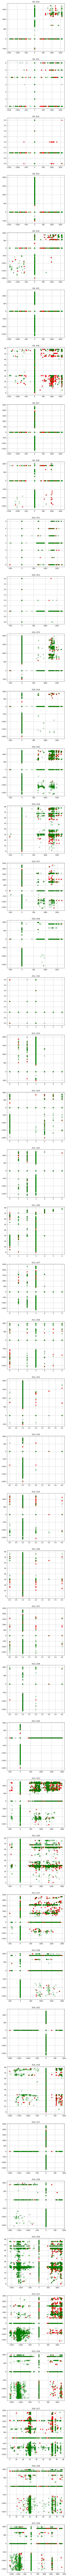

In [0]:
def graph(i,j):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for k in range(len(table["CLASS"])):
        if table["CLASS"][k]!="F":
            x1.append(table[i][k])
            y1.append(table[j][k])
        else:
            x2.append(table[i][k])
            y2.append(table[j][k])
    plt.plot(x2, y2, "ro", alpha = 0.9)              #red - Fraud
    plt.plot(x1, y1, "gs", alpha = 0.3)              #green - Legit
    plt.title(i+", "+j)
    plt.grid()

props = ["X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18"]
lenp = len(props)

ax = []

c=0
f = plt.figure(figsize=(7,8*lenp*(lenp-1)))
for p1 in range(lenp):
    for p2 in range(p1+1,lenp):
        c+=1
        ax = f.add_subplot(lenp*lenp,1,c)
        graph(props[p1],props[p2])            

plt.show()

In [0]:
def graph(i,j):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for k in range(len(table["CLASS"])):
        if table["CLASS"][k]!="F":
            x1.append(table[i][k])
            y1.append(table[j][k])
        else:
            x2.append(table[i][k])
            y2.append(table[j][k])
    plt.plot(x2, y2, "ro", alpha = 0.9)              #red - Fraud
    plt.plot(x1, y1, "gs", alpha = 0.3)              #green - Legit
    plt.title(i+", "+j)
    plt.grid()
    
props = ["X14", "X15", "X16", "X17", "X18", "X22", "X23", "X24", "X26"]
lenp = len(props)

ax = []

c=0
f = plt.figure(figsize=(7,8*lenp*(lenp-1)))
for p1 in range(lenp):
    for p2 in range(p1+1,lenp):
        c+=1
        ax = f.add_subplot(lenp*lenp,1,c)
        graph(props[p1],props[p2])            

plt.show()

In [0]:
props = ["X9", "X10", "X11", "X12", "X13", "X22", "X23", "X24", "X26"]
lenp = len(props)

ax = []

c=0
f = plt.figure(figsize=(7,8*lenp*(lenp-1)))
for p1 in range(lenp):
    for p2 in range(p1+1,lenp):
        c+=1
        ax = f.add_subplot(lenp*lenp,1,c)
        graph(props[p1],props[p2])            

plt.show()

In [0]:
def falsepos(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]=="G"):
            c1+=1
            if (table[rule][i]>=percent):
                c2+=1
    print("fp: "+str(c2/c1))

def falseneg(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]!="G"):
            c1+=1
            if (table[rule][i]<=percent):
                c2+=1
    print("fn: "+str(c2/c1))

def recall(rule,percent):
    fsfr=fslr=lsfr=0
    q=len(table[rule])
    for i in range(q):
        if (table[rule][i]>=percent):
            if (table["CLASS"][i]!="G"):
                fsfr+=1
            else:
                fslr+=1
        else:
            if (table["CLASS"][i]!="G"):
                lsfr+=1
    print("recall: "+str(fsfr/(fsfr+q*lsfr)))
    print("precicion: "+str(fsfr/(fsfr+q*fslr)))

for p in range(1,6):
    rule="p"+str(p)+"_Fraud"
    print(rule+":")
    falsepos(rule,0.5)
    falseneg(rule,0.5)
    recall(rule,0.5)
    
#fp<=0.2 if:
#r1=0.69
#r2=0.79
#r3=0.54
#r4=0.53
#r5=0.99

p1_Fraud:
fp: 0.39233423969880776
fn: 0.699901768172888
recall: 1.4727631459551035e-05
precicion: 1.3958185778049537e-05
p2_Fraud:
fp: 0.42851913825559507
fn: 0.2738703339882122
recall: 9.136981298182105e-05
precicion: 3.0863568818254935e-05
p3_Fraud:
fp: 0.31525831416021755
fn: 0.15471512770137524
recall: 0.00018696848550509932
precicion: 4.872584242603643e-05
p4_Fraud:
fp: 0.34417485881614723
fn: 0.43339882121807466
recall: 4.4772086249560754e-05
precicion: 2.9950534439731754e-05
p5_Fraud:
fp: 0.5268249320225894
fn: 0.1319253438113949
recall: 0.000225654137354446
precicion: 2.995122962329499e-05


0.0751435858382572
0.18019930148268126
0.39273492278822086


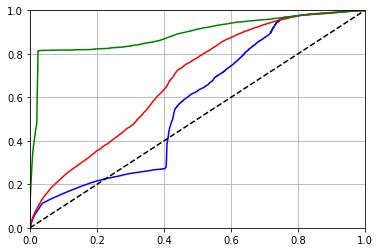

In [0]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y = np.array(table["CLASS"])
x1 = np.array(table["p1_Fraud"])
x2 = np.array(table["p2_Fraud"])
x3 = np.array(table["p3_Fraud"])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

0.3661970040164524


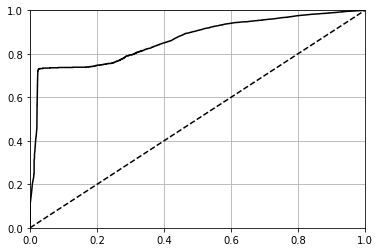

In [0]:
y = np.array(table["CLASS"])
a=1
b=1
c=10
x4 = (a*x1+b*x2+c*x3)/(a+b+c)
fpr, tpr, thresholds = roc_curve(y,x4,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'k')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

In [0]:
def predict(row):
    res = 1
    if 400<abs(row["X9"])<500 and row["X15"]==0:
        res *= 0.3
    if 400<abs(row["X9"])<500 and row["X18"]==898:
        res *= 0.3
    if row["X9"]>0 and row["X18"]<0:
        res *= 0.3
    if 1100<row["X17"]<1500 and row["X26"]==1:
        res *= 0.3
    if row["X9"]>0 and row["X12"]>0:
        res *= 0.3
    if row["X17"]>1500 and row["X16"]>60:
        res *= 0.3
    if row["X12"]>2 and row["X26"]<1:
        res *= 0.3
    if 0<row["X14"]<500 and row["X15"]==0:
        res *= 0.3
    if 0<row["X22"]:
        res *= 0.3
    return 1-res

table["p0_Fraud"] = table.apply(lambda row: predict(row), axis=1)
print(table["p0_Fraud"].unique())

[0.7    0.91   0.     0.973  0.9919]


In [0]:
for p in range(0,1):
    rule="p"+str(p)+"_Fraud"
    print(rule+":")
    falsepos(rule,0.5)
    falseneg(rule,0.5)
    recall(rule,0.5)

p0_Fraud:
fp: 1.0
fn: 0.001768172888015717
recall: 0.01890133436501412
precicion: 1.81328335442389e-05


0.0751435858382572
0.18019930148268126
0.39273492278822086
0.05262538917880155


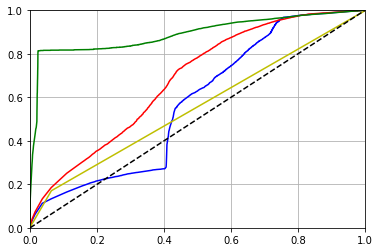

In [0]:
y = np.array(table["CLASS"])
x1 = np.array(table["p1_Fraud"])
x2 = np.array(table["p2_Fraud"])
x3 = np.array(table["p3_Fraud"])
x0 = np.array(table["p0_Fraud"])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
fpr, tpr, thresholds = roc_curve(y,x0,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'y')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

table = pd.read_csv("table.csv", sep = ";")
N = 26000
K = len(table["X9"])

le = LabelEncoder()
table["X22"].replace(np.nan, 0.0, inplace=True)
table["AMOUNT"].replace(np.nan, 0.0, inplace=True)
table.replace(np.nan, "nul", inplace=True)
le.fit(table.EVENT_TYPE_EX)
table["EVENT_TYPE_EX"] = le.transform(table.EVENT_TYPE_EX)
le.fit(table.X11)
table["X11"] = le.transform(table.X11)
le.fit(table.X12)
table["X12"] = le.transform(table.X12)
le.fit(table.X16)
table["X16"] = le.transform(table.X16)
le.fit(table.X24)
table["X24"] = le.transform(table.X24)
le.fit(table.X26)
table["X26"] = le.transform(table.X26)
dct = {"F": 1, "G": 0, "U":0}
table["CLASS1"] = table["CLASS"].map(dct)

X = np.array([table["EVENT_TYPE_EX"].values[0:N], table["AMOUNT"].values[0:N], table["X9"].values[0:N], 
              table["X10"].values[0:N], table["X11"].values[0:N], table["X12"].values[0:N], 
              table["X13"].values[0:N], table["X14"].values[0:N], table["X15"].values[0:N], 
              table["X16"].values[0:N], table["X17"].values[0:N], table["X18"].values[0:N], 
              table["X22"].values[0:N], table["X24"].values[0:N], table["X26"].values[0:N]])
X = X.transpose()
y = table["CLASS1"][0:N].values

P = np.array([table["EVENT_TYPE_EX"].values[N:K], table["AMOUNT"].values[N:K], table["X9"].values[N:K], 
              table["X10"].values[N:K], table["X11"].values[N:K], table["X12"].values[N:K], 
              table["X13"].values[N:K], table["X14"].values[N:K], table["X15"].values[N:K], 
              table["X16"].values[N:K], table["X17"].values[N:K], table["X18"].values[N:K], 
              table["X22"].values[N:K], table["X24"].values[N:K], table["X26"].values[N:K]])
P = P.transpose()

#table["p0_Fraud"] = table.apply(lambda row: predict(row), axis=1)
#print(table["p0_Fraud"].unique())


clf = RandomForestClassifier(n_estimators=800, max_depth=10,
                             random_state=0)
clf.fit(X, y)  

print(clf.feature_importances_)

dct = {}
table["p0_Fraud"] = table["X26"].map(dct)

for i in range(N,K):
    p0 = clf.predict([P[i-N].tolist()])[0]
    table.loc[i, "p0_Fraud"] = p0
#print(table["p0_Fraud"][N:N+10])

[0.07544696 0.16286365 0.03241846 0.02177886 0.06676502 0.00118782
 0.02333474 0.03120152 0.25942611 0.06363862 0.12465934 0.01882505
 0.04099058 0.03563753 0.04182573]


In [4]:
def falsepos(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]=="G"):
            c1+=1
            if (table[rule][i]>=percent):
                c2+=1
    print("fp: "+str(c2/c1))

def falseneg(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]!="G"):
            c1+=1
            if (table[rule][i]<=percent):
                c2+=1
    print("fn: "+str(c2/c1))

def recall(rule,percent):
    fsfr=fslr=lsfr=0
    q=len(table[rule])
    for i in range(q):
        if (table[rule][i]>=percent):
            if (table["CLASS"][i]!="G"):
                fsfr+=1
            else:
                fslr+=1
        else:
            if (table["CLASS"][i]!="G"):
                lsfr+=1
    print("recall: "+str(fsfr/(fsfr+q*lsfr)))
    print("precicion: "+str(fsfr/(fsfr+q*fslr)))
    
rule="p0_Fraud"
print(rule+":")
falsepos(rule,0.5)
falseneg(rule,0.5)
recall(rule,0.5)

p0_Fraud:
fp: 0.010458063166701528
fn: 0.05029469548133595
recall: 2.616666843216487e-06
precicion: 0.00012368794810224302


0.051982581111915005
0.16127000469061803
0.3963321752542076
0.24549780176971459


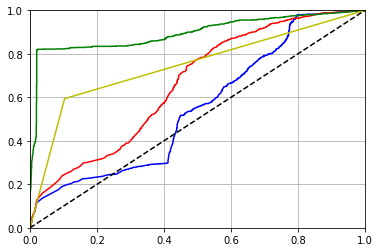

In [6]:
from sklearn.metrics import roc_curve, auc

y = np.array(table["CLASS"][N:K])
x1 = np.array(table["p1_Fraud"][N:K])
x2 = np.array(table["p2_Fraud"][N:K])
x3 = np.array(table["p3_Fraud"][N:K])
x0 = np.array(table["p0_Fraud"][N:K])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
fpr, tpr, thresholds = roc_curve(y,x0,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'y')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()